Saving marketing_campaign.csv to marketing_campaign.csv
Done step 1, shape: (2216, 31)
Unique customer: 2216
Max date: 2014-06-29 00:00:00
Shape mới: (2208, 31)
Thu nhập max mới: 113734.0


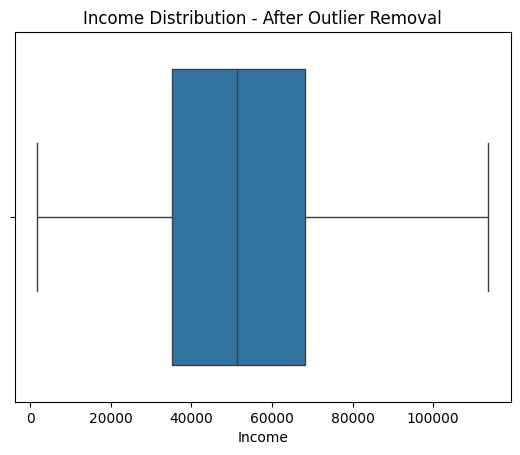

  Income_segment Spending_segment Recency_segment
0  Normal income    High spending        Inactive
1  Normal income     Low spending          Recent
2    High income  Normal spending        Moderate
3     Low income     Low spending          Recent
4  Normal income  Normal spending          Recent
5  Normal income  Normal spending        Moderate
6  Normal income  Normal spending        Inactive
7     Low income  Normal spending        Moderate
8     Low income     Low spending        Moderate
9     Low income     Low spending          Recent
Income_segment  Spending_segment  Recency_segment
Low income      Low spending      Recent             229
High income     High spending     Inactive           221
                                  Recent             202
Low income      Low spending      Moderate           193
Normal income   Normal spending   Moderate           185
High income     High spending     Moderate           185
Low income      Low spending      Inactive           163
N

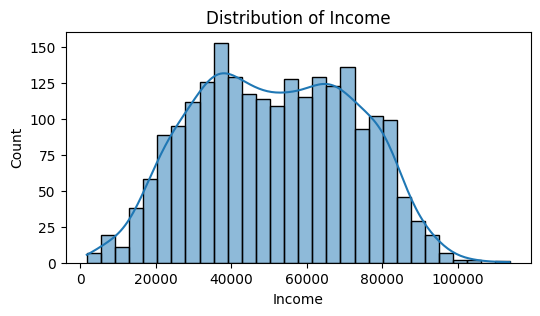

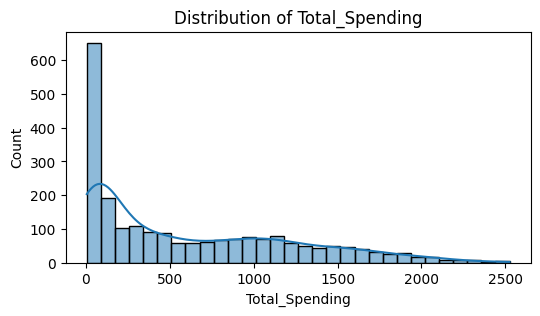

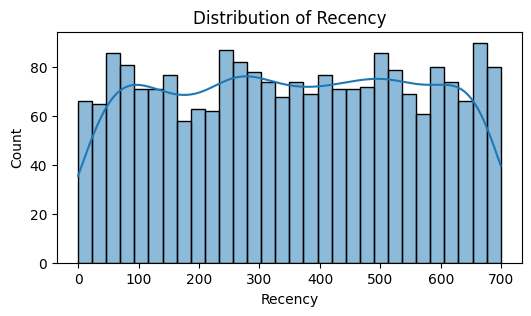

                  Income  Total_Spending   Recency
Income          1.000000        0.823628 -0.025289
Total_Spending  0.823628        1.000000  0.158079
Recency        -0.025289        0.158079  1.000000


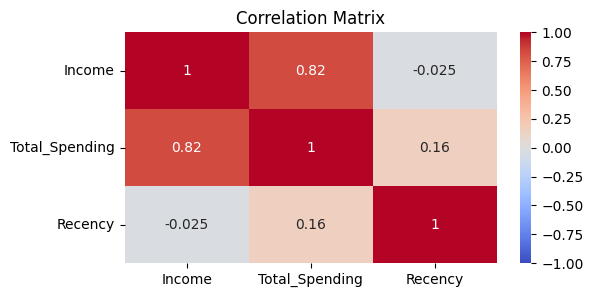

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load & đọc dữ liệu
from google.colab import files
uploaded = files.upload()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("marketing_campaign.csv", sep=";")

# Chuyển đổi cột Dt_Customer từ dạng ngày tháng năm sang dạng datetime, sau đó tính Days_Since_Customer - Số ngày từ ngày khách hàng bắt đầu đến ngày mới nhất trong dataset.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Days_Since_Customer'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

# Xử lý missing value - Drop những khách hàng thiếu giá trị ở cột Income
df = df.dropna(subset=['Income'])

# Tạo biến mới "Total_Spending" bằng tổng chi tiêu trên tất cả sản phẩm
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
print("Done step 1, shape:", df.shape)
print("Unique customer:", df["ID"].nunique())
print("Max date:", df['Dt_Customer'].max())

# Loại bỏ Outlier - Áp dụng IQR để loại bỏ khách hàng có thu nhập quá thấp hoặc quá cao
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df.loc[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)].copy()
print("Shape mới:", df.shape)
print("Thu nhập max mới:", df['Income'].max())
sns.boxplot(x=df['Income'])
plt.title("Income Distribution - After Outlier Removal")
plt.show()

# Phân khúc khách hàng
df['Income_segment'] = pd.qcut(df['Income'], q=3, labels=["Low income", "Normal income", "High income"], duplicates='drop')
df['Spending_segment'] = pd.qcut(df['Total_Spending'], q=3, labels=["Low spending", "Normal spending", "High spending"], duplicates='drop')
df['Recency'] = df['Days_Since_Customer']
df['Recency_segment'] = pd.qcut(df['Recency'], q=3, labels=["Recent", "Moderate", "Inactive"], duplicates='drop')
print(df[['Income_segment','Spending_segment','Recency_segment']].head(10))
print(df[['Income_segment','Spending_segment','Recency_segment']].value_counts())

# Phân tích sơ bộ (Vẽ boxplot thu nhập sau khi loại outlier + Vẽ histogram cho Income, Total_Spending, Recency + Tính và vẽ heatmap correlation giữa Income, Total_Spending, Recency)
num_vars = ['Income', 'Total_Spending', 'Recency']
for var in num_vars:
  plt.figure(figsize = (6,3))
  sns.histplot(df[var], bins = 30, kde = True)
  plt.title(f"Distribution of {var}")
  plt.show()
num_cols = ['Income', 'Total_Spending', 'Recency']
corr = df[num_cols].corr()
print(corr)
plt.figure(figsize = (6,3))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title("Correlation Matrix")
plt.show()
df.to_csv("marketing_clean.csv", index = False, encoding = 'utf-8-sig')

# Xuất file kết quả
from google.colab import files
files.download("marketing_clean.csv")
corr.to_csv("correlation_matrix.csv", index = True)
files.download("correlation_matrix.csv")